In [1]:
# 5 train
# average AM enters / exits

In [3]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [4]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [6]:
# look at 5 line only
five_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('5')]

In [7]:
# look at all station names
five_train_all['STATION'].unique()

array(['125 ST', '138/GRAND CONC', '14 ST-UNION SQ', '149/GRAND CONC',
       '174 ST', '219 ST', '225 ST', '233 ST', '3 AV-149 ST', '59 ST',
       '86 ST', 'ALLERTON AV', 'ATL AV-BARCLAY', 'BAYCHESTER AV',
       'BEVERLY RD', 'BOROUGH HALL', 'BOTANIC GARDEN', 'BOWLING GREEN',
       'BRONX PARK EAST', 'BROOKLYN BRIDGE', 'BURKE AV', 'CHAMBERS ST',
       'CHURCH AV', 'E 180 ST', 'EASTCHSTER/DYRE', 'FLATBUSH AV-B.C',
       'FRANKLIN AV', 'FREEMAN ST', 'FULTON ST', 'GRD CNTRL-42 ST',
       'GUN HILL RD', 'INTERVALE AV', 'JACKSON AV', 'MORRIS PARK',
       'NEREID AV', 'NEVINS ST', 'NEWKIRK AV', 'PELHAM PKWY',
       'PRESIDENT ST', 'PROSPECT AV', 'SIMPSON ST', 'STERLING ST',
       'WALL ST', 'WEST FARMS SQ', 'WINTHROP ST'], dtype=object)

In [8]:
# check station count
five_train_all['STATION'].count()

52

In [10]:
# needs further cleaning
five_train_all["STATION"].replace("CHAMBERS ST", value="BROOKLYN BRIDGE", inplace=True)
five_train_all["STATION"].replace("BOTANIC GARDEN", value="FRANKLIN AV", inplace=True)

In [12]:
# now sum same name rows
five_commuters = five_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
five_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
125 ST,20342.0,18847.0
138/GRAND CONC,2015.0,1298.0
14 ST-UNION SQ,17962.0,48134.0
149/GRAND CONC,4322.0,2052.0
174 ST,9148.0,3042.0


In [13]:
# order stations in excel
# save as csv
five_commuters.to_csv('five_commuters.csv')

In [14]:
# open ordered CSV
csv_path_five = 'five_commuters_order.csv'
five_commuters_order = pd.read_csv(csv_path_five, encoding="utf-8")
five_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,EASTCHSTER/DYRE,9753,2404
1,BAYCHESTER AV,6655,312
2,GUN HILL RD,15705,4186
3,PELHAM PKWY,17299,2451
4,MORRIS PARK,5371,353


In [15]:
five_commuters_order['AM_AVG_ENTER'] = five_commuters_order['AM_ENTERS']/5

In [16]:
five_commuters_order['AM_AVG_EXIT'] = five_commuters_order['AM_EXITS']/5
five_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,EASTCHSTER/DYRE,9753,2404,1950.6,480.8
1,BAYCHESTER AV,6655,312,1331.0,62.4
2,GUN HILL RD,15705,4186,3141.0,837.2
3,PELHAM PKWY,17299,2451,3459.8,490.2
4,MORRIS PARK,5371,353,1074.2,70.6


In [17]:
# order stations in excel
# save as csv
five_commuters_order.to_csv('five_commuters_final.csv')

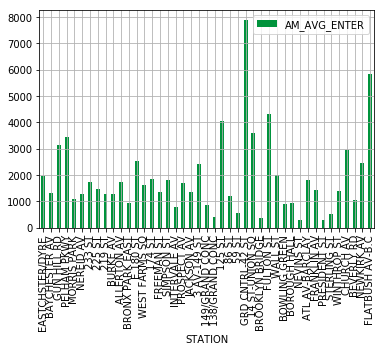

In [18]:
# graph 5 Train AM AVG ENTERS
plt = five_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#00933C')
plt.grid()

# save the fig
plt.figure.savefig('5-AM-enter.pdf')

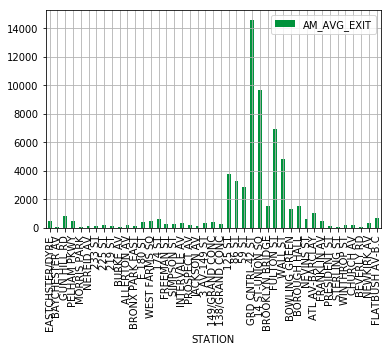

In [19]:
# graph 5 Train AM AVG EXITS
plt = five_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#00933C')
plt.grid()

# save the fig
plt.figure.savefig('5-AM-exit.pdf')